# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

<div class="alert alert-block alert-danger">
    
1. Import the Boston Housing dataset.
2. Display the correlation matrix and select only the highly correlated features with the label (MEDV feature) using a threshold value of 0.6.
3. Verify if the selected features represent a linear relationship with the target variable based on a 3D plot.
4. Split the generated dataset.
5. Normalize the data (excluding the label) using the min max scaler strategy.


<div/>

### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [1]:
# from sklearn.linear_model import SGDRegressor
# sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001,max_iter=1000,verbose=1)

<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

In [2]:
import numpy as np

def computeCost(X, y, theta):

    m = len(y)
    J = np.sum((X.dot(theta) - y) ** 2) / (2 * m)  
    return J


def gradient_descent(X, y, theta, alpha, iterations):
   
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis - y
        gradient = X.T.dot(loss) / len(y)
        theta = theta - (alpha * gradient)
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
    
    return theta, cost_history




    

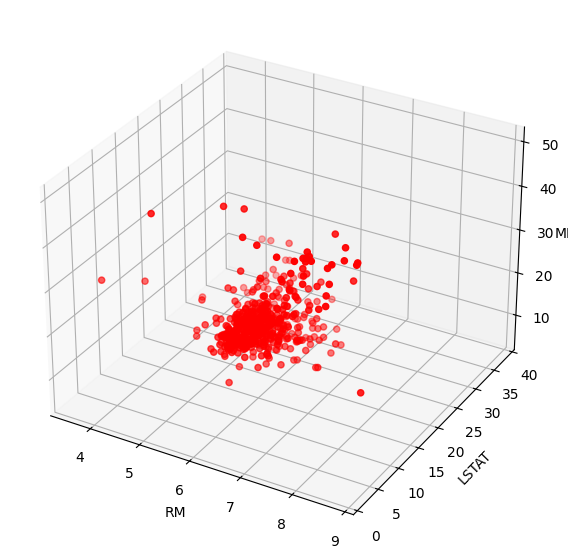

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer
data = pd.read_csv('data/HousingData.csv')

correlation_matrix = data.corr()


high_correlation_features = correlation_matrix['MEDV'][correlation_matrix['MEDV'].abs() >= 0.6].index
 
data = data[high_correlation_features]

imputer = SimpleImputer(strategy='mean')  
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# data = data.dropna()

# data = (data - data.mean()) / data.std()
# print("data = \n", data.head())   
# print()
# print("data.describe = \n" , data.describe())
# data.insert(0,'ones',1)
# print("data after normalization = \n", data.head())

X= data.drop('MEDV', axis=1)
y= data['MEDV']



fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['RM'], X['LSTAT'],y, c='r', marker='o')

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

plt.show()



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# X = np.matrix(X.values)
# y = np.matrix(y.values)
# theta = np.matrix(np.array([0,0,0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)        
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)  

print(X_train)
print('-------------------------------------')
print(y_train)



           RM     LSTAT
0    0.293065  0.639625
1    0.400854  0.185982
2    0.440919  0.168322
3    0.455562  0.594923
4    0.379093  0.263521
..        ...       ...
399  0.401261  0.467163
400  0.405328  0.310982
401  0.563758  0.117550
402  0.562538  0.594371
403  0.516982  0.245585

[404 rows x 2 columns]
-------------------------------------
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64


In [ ]:

    


# alpha = 0.0001
# decay_rate = 1e-4
# iters = 1000
# tol=1e-20
# g,cost = gradientDescent(X_train , y_train , theta, alpha,decay_rate , iters,tol)

# print('g = ' ,g)


# plt.figure(figsize=(10, 6))
# plt.plot(cost, color='blue', label='Loss')
# plt.title(f'Convergence Graph with alpha = {alpha} and decay_rate = {decay_rate}')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid()
# plt.show()



C:\Users\el badr info\myenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\el badr info\myenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


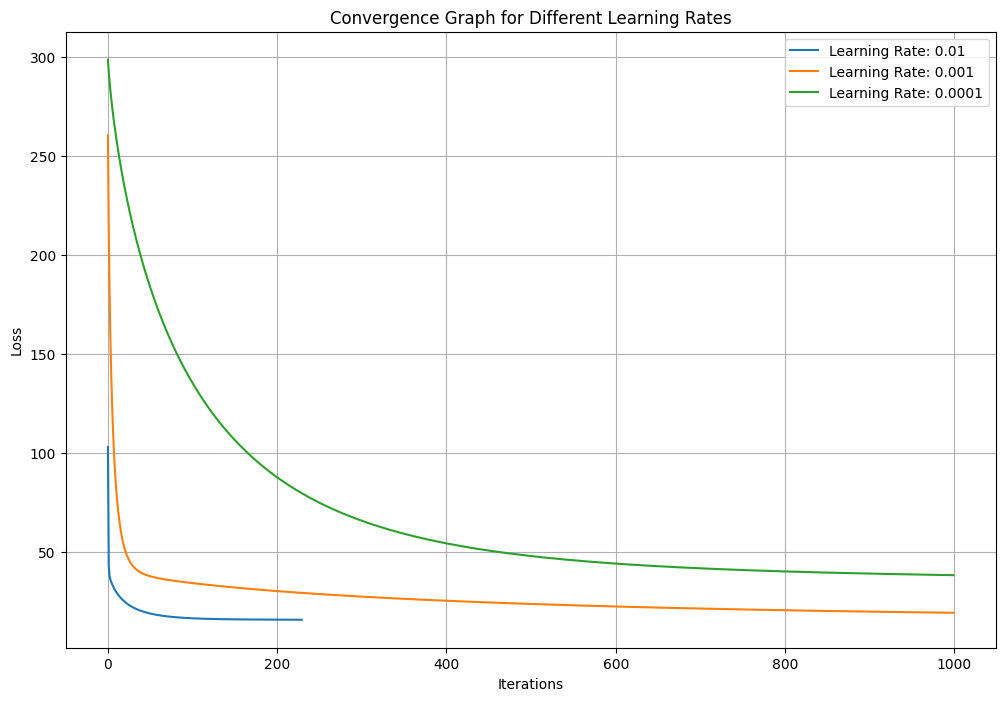

In [21]:
import io
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from contextlib import redirect_stdout
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



learning_rates = [0.01, 0.001, 0.0001]
losses_dict = {}

models = []
results = []

for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1000, verbose=1 , tol = 1e-3,n_iter_no_change=5 )

    f = io.StringIO()
    with redirect_stdout(f):
         sgdr.fit(X_train, y_train)
         y_pred = sgdr.predict(X_test)
         mae = mean_absolute_error(y_test, y_pred)
         mse = mean_squared_error(y_test, y_pred)
         rmse = np.sqrt(mse)
         r2 = r2_score(y_test, y_pred)
         sgdr=models.append({
        'Learning Rate': lr,
        'coefficients': sgdr.coef_,
        'intercept': sgdr.intercept_[0],
    })
         results.append({
        'Learning Rate': lr,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })
    
    results_df = pd.DataFrame(results)
    models_df = pd.DataFrame(models)

    verbose_output = f.getvalue()
    losses = re.findall(r'loss: ([0-9]+\.[0-9]+)', verbose_output)
    losses = list(map(float, losses))  


    losses_dict[lr] = losses

# Tracer les courbes de convergence
plt.figure(figsize=(12, 8))
for lr, losses in losses_dict.items():
    plt.plot(losses, label=f'Learning Rate: {lr}')
    
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence Graph for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()



0

Meilleur modèle avec Learning Rate = 0.01
Coefficient(s) : [ 26.39014587 -21.83353461]
Intercept : 16.124928915285103


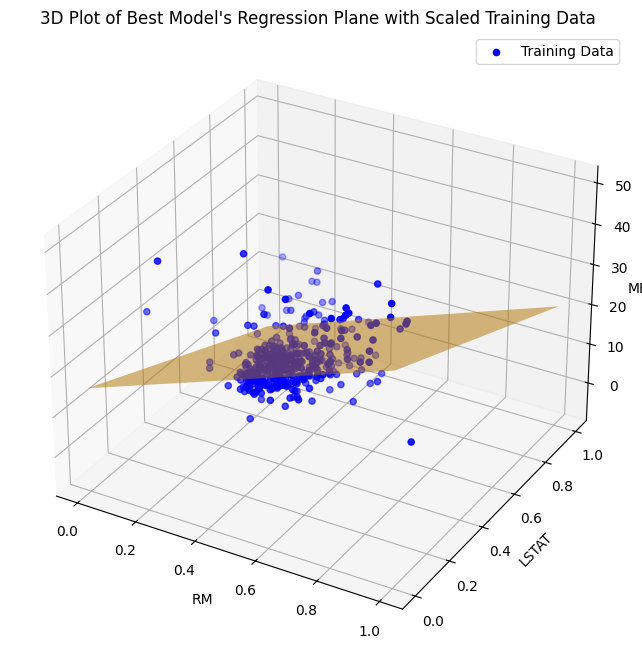

Predicted MEDV for the sample: 13.480545786193984


In [22]:



best_model_index = results_df['R2'].idxmax()
print(best_model_index)
best_model = models_df.loc[best_model_index]
best_lr = results_df.loc[best_model_index, 'Learning Rate']
best_coefficients = best_model['coefficients']
best_intercept = best_model['intercept']


print(f"\nMeilleur modèle avec Learning Rate = {best_lr}")
print(f"Coefficient(s) : {best_coefficients}")
print(f"Intercept : {best_intercept}")

x = np.linspace(X_train.iloc[:, 0].min(), X_train.iloc[:, 0].max(), 10)  #RM
y = np.linspace(X_train.iloc[:, 1].min(), X_train.iloc[:, 1].max(), 10)  #LSTAT

X, Y = np.meshgrid(x, y)


Z = best_intercept + best_coefficients[0] * X + best_coefficients[1] * Y

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train, color='blue', label="Training Data")

ax.plot_surface(X, Y, Z, color='orange', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV")
ax.set_title("3D Plot of Best Model's Regression Plane with Scaled Training Data")
ax.legend()

plt.show()
sample = {
    'RM': [5.713],
    'LSTAT': [22.6]
}
sample = pd.DataFrame(sample)

sample = scaler.transform(sample)

predicted_value = best_intercept + best_coefficients[0] * sample[0, 0] + best_coefficients[1] * sample[0, 1]
print("Predicted MEDV for the sample:", predicted_value)